In [1]:
import matplotlib.pyplot as plt
from glob import glob
results_dir = '/home/luke/code/eqm_mnist/eqm_mnist/train/results/'
loss_files = glob(f'{results_dir}/*/*/losses.npy')
loss_files


['/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/base_grad_10/losses.npy',
 '/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/eqm_base/losses.npy',
 '/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/base_grad_1/losses.npy',
 '/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/base_grad_2/losses.npy']

{'batch_size': 250, 'c_alpha': 0.8, 'c_beta': 0.2, 'c_function': 'linear', 'channels': [32, 64, 128], 'eta': 0.2, 'experiment_name': 'base_grad_10', 'grad_multiplier': 10.0, 'lr': 0.001, 'num_epochs': 1000, 'num_residual_layers': 2, 'save_dir': './results/eqm/', 't_embed_dim': 40, 'y_embed_dim': 40}
{'batch_size': 250, 'c_alpha': 0.8, 'c_beta': 0.2, 'c_function': 'linear', 'channels': [32, 64, 128], 'eta': 0.2, 'experiment_name': 'eqm_base', 'grad_multiplier': 4.0, 'lr': 0.001, 'num_epochs': 1000, 'num_residual_layers': 2, 'save_dir': './results/eqm/', 't_embed_dim': 40, 'y_embed_dim': 40}
{'batch_size': 250, 'c_alpha': 0.8, 'c_beta': 0.2, 'c_function': 'linear', 'channels': [32, 64, 128], 'eta': 0.2, 'experiment_name': 'base_grad_1', 'grad_multiplier': 1.0, 'lr': 0.001, 'num_epochs': 1000, 'num_residual_layers': 2, 'save_dir': './results/eqm/', 't_embed_dim': 40, 'y_embed_dim': 40}
{'batch_size': 250, 'c_alpha': 0.8, 'c_beta': 0.2, 'c_function': 'linear', 'channels': [32, 64, 128], 'e

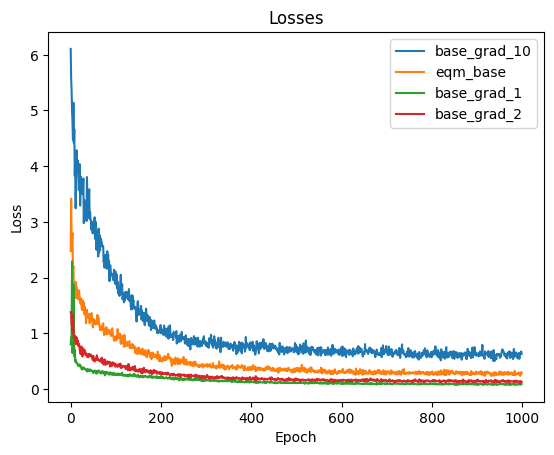

In [2]:
import numpy as np
import yaml
# Load the losses and plot them
fig = plt.figure()
for loss_file in loss_files:
    # get the config from the filename
    config = loss_file.replace('losses.npy', 'config.yaml')
    with open(config, 'r') as f:
        config = yaml.safe_load(f)
    print(config)
    losses = np.load(loss_file) / config['grad_multiplier']
    plt.plot(losses, label=config['experiment_name'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses')
plt.legend()
plt.show()

In [3]:
# plot the samples
sample_files = glob(f'{results_dir}/*/*/samples.npy')


/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/base_grad_10/samples.npy


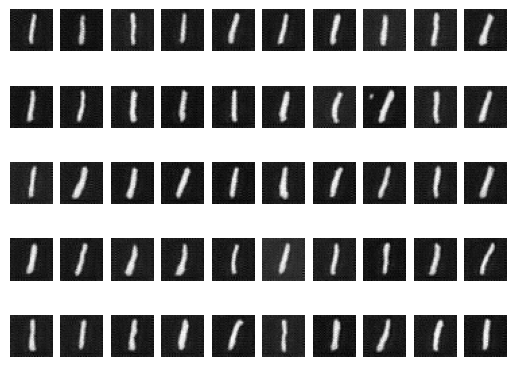

/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/eqm_base/samples.npy


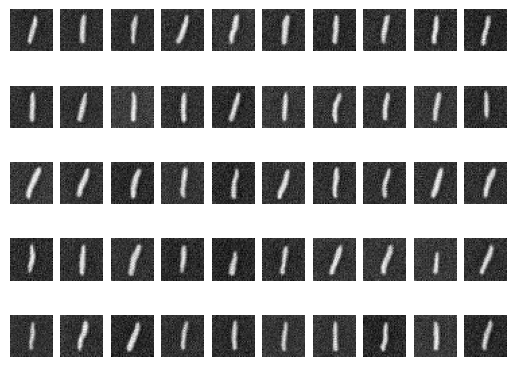

/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/base_grad_1/samples.npy


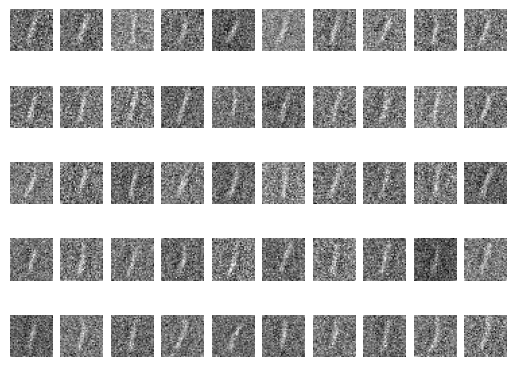

/home/luke/code/eqm_mnist/eqm_mnist/train/results/eqm/base_grad_2/samples.npy


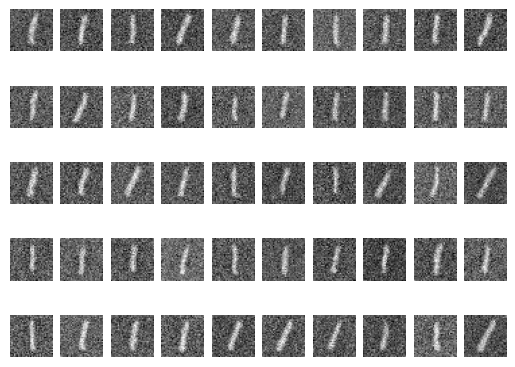

In [4]:
# plot the first 50 samples in black and white
# and remove the x/y axes
fig = plt.figure()
for sf in sample_files:
    samples = np.load(sf)
    print(sf)
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.axis('off')
        plt.imshow(samples[i][0], cmap='gray')
    plt.show()
